## Guiding Question
How does the relationship between economic development (GDP per capita) and environmental impact (CO₂ emissions per capita) differ across World Bank income groups, and what other development factors (e.g., renewable energy, governance) are associated with a more sustainable development path?

In [74]:
import numpy as np 
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [120]:
large_df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")
large_df.head()

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022


In [121]:
large_df['year'] = pd.to_datetime(large_df['year'], format='%Y')

In [122]:
large_df['country_name'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'OECD members', 'Other sm

In [123]:
large_df.columns

Index(['year', 'country_code', 'country_name', 'region', 'income_group',
       'currency_unit', 'gdp_usd', 'population', 'gdp_per_capita',
       'inflation_rate', 'unemployment_rate', 'fdi_pct_gdp',
       'co2_emissions_kt', 'energy_use_per_capita', 'renewable_energy_pct',
       'forest_area_pct', 'electricity_access_pct', 'life_expectancy',
       'child_mortality', 'school_enrollment_secondary',
       'health_expenditure_pct_gdp', 'hospital_beds_per_1000',
       'physicians_per_1000', 'internet_usage_pct',
       'mobile_subscriptions_per_100', 'calculated_gdp_per_capita',
       'real_economic_growth_indicator', 'econ_opportunity_index',
       'co2_emissions_per_capita_tons', 'co2_intensity_per_million_gdp',
       'green_transition_score', 'ecological_preservation_index',
       'renewable_energy_efficiency', 'human_development_composite',
       'healthcare_capacity_index', 'digital_connectivity_index',
       'health_development_ratio', 'education_health_ratio',
       'ye

In [79]:
groupings = ['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'OECD members', 'Other small states',
       'Pre-demographic dividend', 'Pacific island small states',
       'Post-demographic dividend', 'South Asia',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'Small states', 'East Asia & Pacific (IDA & IBRD)',
       'Europe & Central Asia (IDA & IBRD)',
       'Latin America & Caribbean (IDA & IBRD)',
       'Middle East & North Africa (IDA & IBRD)',
       'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD)',
       'Upper middle income', 'World']

From the previous output, we see there are already some useful groupings of countries (i.e. OECD members, Heavily indebted and poor countries, etc.). We can make a list of useful groupings and find some basic information about each of them in this exploratory phase. 

### Formulating Hypotheses

In 2000, the UN formulated its millenium development goals for the year 2015, which were succeeded by the sustainable development goals (SDGs) in 2016. That same year, the Paris agreement was signed and became effective.

Some major trends during this period (2000-2020) include the tail-end of globalization and the rise of China as an economic power. This period includes the rise of social media, the great recession, the US leaving the Paris agreements. By 2000, much of the offshoring of manufacturing would have been completed, so I anticipate emissions of global South countries to be inflated by their manufacturing load for exports. 

Energy Usage per capita * % green energy = green energy usage per capita

Here are some preliminary questions for research: 
1. What effect does energy usage have on economic growth?
2. What effect does electricity access have on developmental indicators?
3. Are richer countries doing the energy transition better? 
4. Is CO2 intensity higher for poorer countries?
5. What effect does indebtedness have on other development indicators? 
6. What role does FDI have on GDP growth? And what role does it have on CO2 emissions?


Some unanswered questions: 
1. What does sustainable development mean from this dataset? 
2. What can we learn from success stories? 

# Carbon Intensity and GDP

Do poorer countries emit more? Are emissions correlated with GDP growth?

In [ ]:
def lineGraph(indicator, grouping, highlight=[], title = "", ax=None): 
            
    offset = pd.Timedelta(days=60)
    last_valid = 0

    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    for country in grouping: 
        temp = large_df[large_df['country_name'] == country]
        if not highlight:
            # Check if highlight is empty 
            ax.plot(
                temp['year'],
                temp[indicator],
            )
        else:
            # User has declared highlight
            ax.plot(
                temp['year'],
                temp[indicator],
                color = 'gray' if country not in highlight else None,
                alpha = 0.3 if country not in highlight else 1.0,
            )

            if country in highlight: 
                last_valid = temp[indicator].last_valid_index()
                if last_valid is not None:
                    x = temp['year'].loc[last_valid] + offset
                    y = temp[indicator].loc[last_valid]
                    ax.text(x, y, s=country, fontsize=9, va='center', ha='left', family='Arial')
            
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontfamily('Arial')

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.set_axisbelow(True)
    ax.set_xlabel("Year", fontsize=12, family='Arial')
    ax.set_ylabel(indicator, fontsize=12, family='Arial')
    if not title:
        ax.set_title(f"{indicator} 2000-{last_valid}", fontsize=16, family='Arial')
    else:
        ax.set_title(title, fontsize=16, family='Arial')
    return ax


In [223]:
# Let's make some lists of the groupings we want to compare across

all_regions = ['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'European Union', 'High income',
       'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean',
       'Middle East & North Africa', 'Middle East & North Africa (excluding high income)',
       'North America', 'Other small states', 'Pacific island small states',
       'South Asia', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'Small states', 'World']

all_income = ['Heavily indebted poor countries (HIPC)', 'High income',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle income', 'Upper middle income', 'World']

high_and_low = ["High income", "World", "Low income"]
high_low_middle = ["High income", 'Middle income', "Upper middle income", "Low income"]
high_low_middle_world = ["High income", 'Middle income', "Upper middle income", "World", "Low income"]

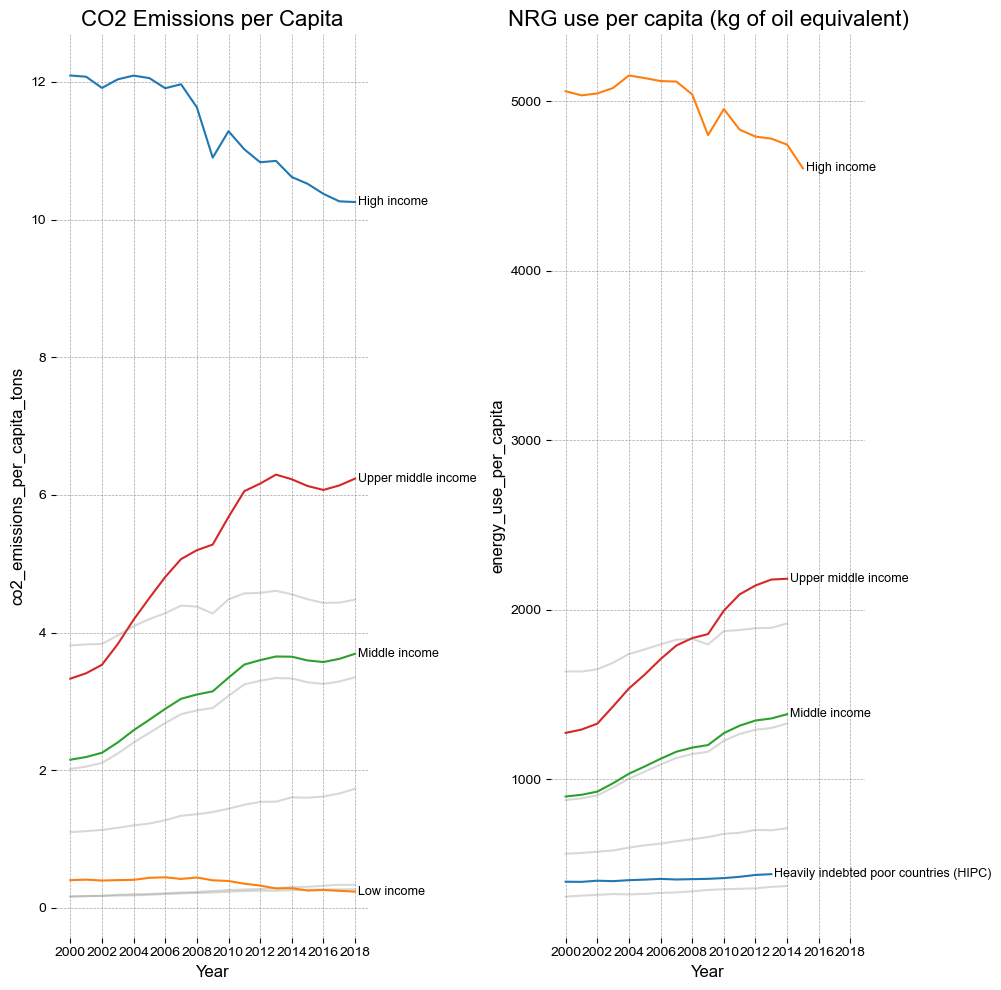

In [235]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10), sharex=True)

lineGraph("co2_emissions_per_capita_tons", all_income, high_low_middle, "CO2 Emissions per Capita", ax=ax1)
lineGraph("energy_use_per_capita", all_income, ['High income', 'Upper middle income', 'Middle income', 
                                    'Heavily indebted poor countries (HIPC)'], "NRG use per capita (kg of oil equivalent)", ax=ax2)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'GDP 2000-2020 (USD)'}, xlabel='Year', ylabel='gdp_usd'>

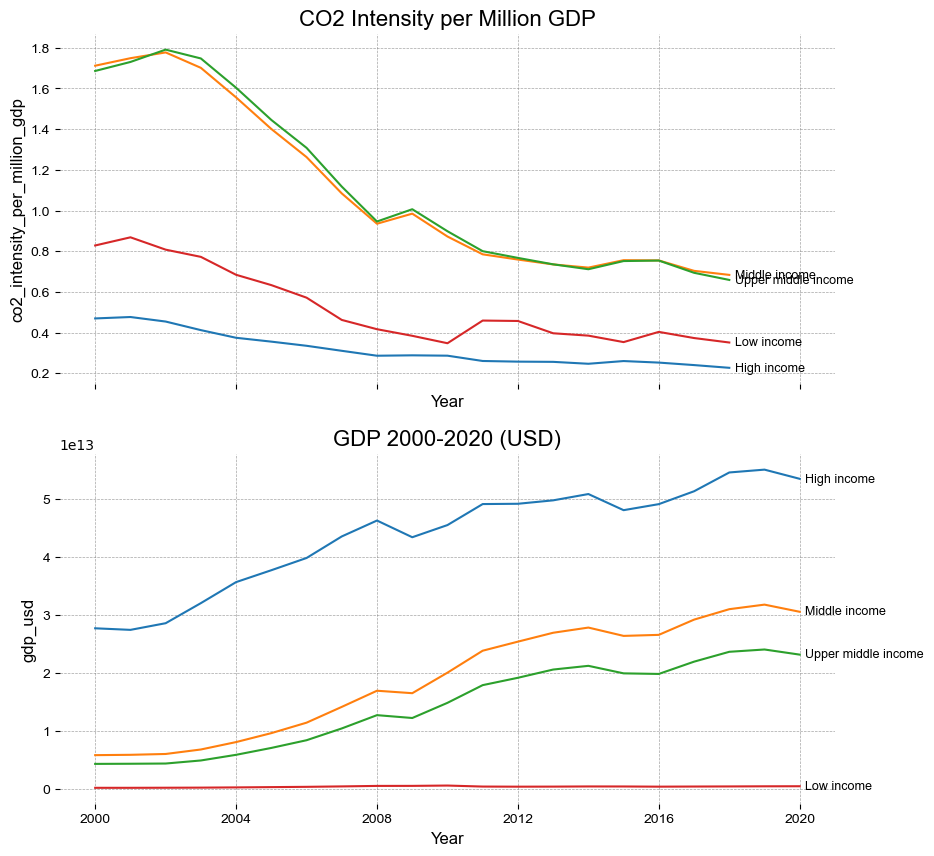

In [234]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10), sharex=True)

lineGraph('co2_intensity_per_million_gdp', high_low_middle, high_low_middle, "CO2 Intensity per Million GDP", ax = ax1)
lineGraph("gdp_usd", high_low_middle, high_low_middle, "GDP 2000-2020 (USD)", ax = ax2)

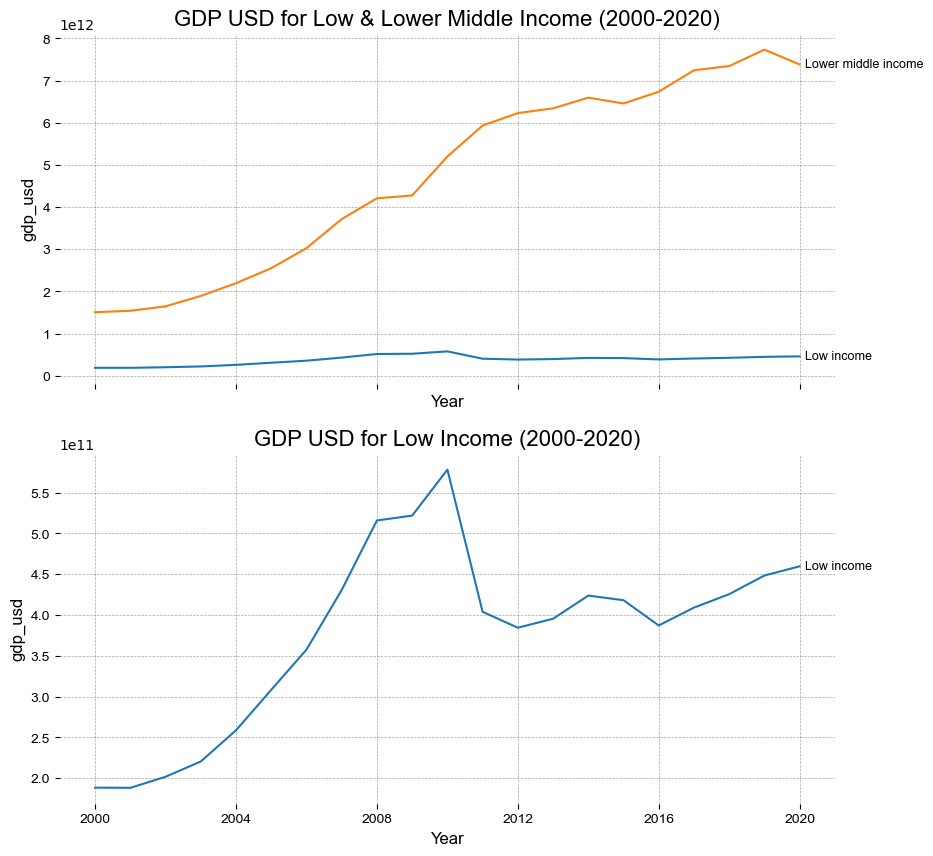

In [247]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,10), sharex=True)
lineGraph('gdp_usd', ["Low income", "Lower middle income"], ["Low income", "Lower middle income"], title="GDP USD for Low & Lower Middle Income (2000-2020)", ax=ax1)
lineGraph('gdp_usd', ["Low income"], ["Low income"], title="GDP USD for Low Income (2000-2020)", ax=ax2)

plt.show()

### Takeaways
From our preliminary analysis I notice some trends:
1. GDP is rising for most countries, except those in the low income classification, which has remained relatively stagnant and has even regressed since their supposed peak in 2010. 
2. While GDP continues to grow, the GDP intensity of most countries has declined
3. Middle and upper middle income countries have the highest GDP intensity out of all income groupings, but this is likely because they do most of the manufacturing for the high income countries.
4. High income countries have the lowest CO2 intensity for GDP, but consume the most energy and emit the most CO2 per capita. Factors such as financialized economies high on the value chain allow them to decrease their CO2 intensity. And their overall CO2 emissions might be lower proportional to their per capita emissions since their populations are smaller. 

# Foreign Direct Investment

Here is the World Bank definition of foreign direct investment: 
>"Foreign direct investment is net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor. It is the sum of equity capital, reinvestment of earnings, other long-term capital, and short-term capital as shown in the balance of payments. This series shows total net, that is, net FDI in the reporting economy from foreign sources less net FDI by the reporting economy to the rest of the world. Data are in current U.S. dollars."

Historically, third-world politicians have criticized foreign direct investment (FDI) as a mechanism for development, since they believe they cede control over their natural resources and develop a dependency relationship with the global North. For instance, attracting FDI requires restructuring an economy to be attractive to investors and organizations such as the IMF. Historically, the IMF and World Bank have conditioned loans on "free market reforms" which downsize investments in healthcare and education, and which can lead to a subservient position in relation to the richer conutries. 

We will examine the correlation between FDI and other key developmental and sustainability indicators.

In [83]:
Index(['year', 'country_code', 'country_name', 'region', 'income_group',
       'currency_unit', 'gdp_usd', 'population', 'gdp_per_capita',
       'inflation_rate', 'unemployment_rate', 'fdi_pct_gdp',
       'co2_emissions_kt', 'energy_use_per_capita', 'renewable_energy_pct',
       'forest_area_pct', 'electricity_access_pct', 'life_expectancy',
       'child_mortality', 'school_enrollment_secondary',
       'health_expenditure_pct_gdp', 'hospital_beds_per_1000',
       'physicians_per_1000', 'internet_usage_pct',
       'mobile_subscriptions_per_100', 'calculated_gdp_per_capita',
       'real_economic_growth_indicator', 'econ_opportunity_index',
       'co2_emissions_per_capita_tons', 'co2_intensity_per_million_gdp',
       'green_transition_score', 'ecological_preservation_index',
       'renewable_energy_efficiency', 'human_development_composite',
       'healthcare_capacity_index', 'digital_connectivity_index',
       'health_development_ratio', 'education_health_ratio',
       'years_since_2000', 'years_since_century', 'is_pandemic_period',
       'human_development_index', 'climate_vulnerability_index',
       'digital_readiness_score', 'governance_quality_index',
       'global_resilience_score', 'global_development_resilience_index'],
      dtype='object')

NameError: name 'Index' is not defined

In [ ]:
fdi_pct_gdp, 
human_development_composite, 
health_expenditure_pct_gdp, 
real_economic_growth_indicator,
econ_opportunity_index,
education_health_ratio

In [6]:
large_df.loc[large_df['region'].isnull()]

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,3.981130e+08,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,4.085221e+08,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,4.192237e+08,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,4.302466e+08,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,4.416301e+08,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2016,WLD,World,NaN,NaN,NaN,7.630506e+13,7.433569e+09,10264.928662,1.550016,...,1.832567,16,16,0,0.723722,0.423209,0.554757,0.5,0.503957,43.649052
1004,2017,WLD,World,NaN,NaN,NaN,8.119329e+13,7.519183e+09,10798.152765,2.192010,...,1.884938,17,17,0,0.727860,0.500000,0.574482,0.5,0.516106,44.216477
1005,2018,WLD,World,NaN,NaN,NaN,8.626760e+13,7.602454e+09,11347.335847,2.438737,...,1.959055,18,18,0,0.734556,0.500000,0.604490,0.5,0.528710,45.024729
1006,2019,WLD,World,NaN,NaN,NaN,8.756805e+13,7.683372e+09,11397.086000,2.206073,...,2.021057,19,19,0,0.739460,0.500000,0.648518,0.5,0.638246,45.985174


In [22]:
countries_2010_19 = (
    large_df.loc[(large_df.year>2009) & (large_df.year<2020)]
    .dropna(subset=['region'])
)

In [35]:
world_2010_19 = (
    large_df.loc[(large_df['year'] > 2009) & (large_df['year'] < 2020) & (large_df['country_code'] == 'WLD')]
)

world_2010_19

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
997,2010,WLD,World,NaN,NaN,NaN,6.648828e+13,6.921855e+09,9605.558823,3.354758,...,1.388354,10,10,0,0.669542,0.379951,0.398254,0.5,0.465677,41.082148
998,2011,WLD,World,NaN,NaN,NaN,7.365375e+13,7.003760e+09,10516.314218,4.822396,...,1.474426,11,11,0,0.681911,0.380182,0.435322,0.5,0.482618,42.111416
999,2012,WLD,World,NaN,NaN,NaN,7.531228e+13,7.089255e+09,10623.441080,3.725327,...,1.548149,12,12,0,0.691700,0.379777,0.463876,0.5,0.489119,42.900311
1000,2013,WLD,World,NaN,NaN,NaN,7.743951e+13,7.175500e+09,10792.210039,2.621050,...,1.637498,13,13,0,0.703176,0.379312,0.489827,0.5,0.494894,43.702814
1001,2014,WLD,World,NaN,NaN,NaN,7.955766e+13,7.261847e+09,10955.568897,2.346269,...,1.712320,14,14,0,0.711972,0.379147,0.511659,0.5,0.502070,44.385997
1002,2015,WLD,World,NaN,NaN,NaN,7.511244e+13,7.347679e+09,10222.608270,1.434318,...,1.771101,15,15,0,0.717745,0.379046,0.529276,0.5,0.497128,44.793735
1003,2016,WLD,World,NaN,NaN,NaN,7.630506e+13,7.433569e+09,10264.928662,1.550016,...,1.832567,16,16,0,0.723722,0.423209,0.554757,0.5,0.503957,43.649052
1004,2017,WLD,World,NaN,NaN,NaN,8.119329e+13,7.519183e+09,10798.152765,2.192010,...,1.884938,17,17,0,0.727860,0.500000,0.574482,0.5,0.516106,44.216477
1005,2018,WLD,World,NaN,NaN,NaN,8.626760e+13,7.602454e+09,11347.335847,2.438737,...,1.959055,18,18,0,0.734556,0.500000,0.604490,0.5,0.528710,45.024729
1006,2019,WLD,World,NaN,NaN,NaN,8.756805e+13,7.683372e+09,11397.086000,2.206073,...,2.021057,19,19,0,0.739460,0.500000,0.648518,0.5,0.638246,45.985174


In [23]:
countries_2010_19

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
1018,2010,ASM,American Samoa,East Asia & Pacific,Upper middle income,U.S. dollar,5.730000e+08,56084.0,10216.817631,NaN,...,NaN,10,10,0,NaN,0.282125,0.000000,0.5,NaN,3.065045
1019,2011,ASM,American Samoa,East Asia & Pacific,Upper middle income,U.S. dollar,5.700000e+08,55755.0,10223.298359,NaN,...,NaN,11,11,0,NaN,0.282500,0.000000,0.5,NaN,3.066990
1020,2012,ASM,American Samoa,East Asia & Pacific,Upper middle income,U.S. dollar,6.400000e+08,55669.0,11496.524098,NaN,...,NaN,12,12,0,NaN,0.280626,0.000000,0.5,NaN,3.538927
1021,2013,ASM,American Samoa,East Asia & Pacific,Upper middle income,U.S. dollar,6.380000e+08,55717.0,11450.724195,NaN,...,NaN,13,13,0,NaN,0.279384,0.000000,0.5,NaN,3.589847
1022,2014,ASM,American Samoa,East Asia & Pacific,Upper middle income,U.S. dollar,6.430000e+08,55791.0,11525.156387,NaN,...,NaN,14,14,0,NaN,0.279823,0.000000,0.5,NaN,3.609617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2015,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.996312e+10,13814642.0,1445.069702,-2.430968,...,NaN,15,15,0,0.358842,0.182209,0.421538,0.5,0.351133,29.645545
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,2.054868e+10,14030338.0,1464.588957,-1.543670,...,NaN,16,16,0,0.370373,0.179093,0.421578,0.5,0.375164,30.424141
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.758489e+10,14236599.0,1235.189032,0.893962,...,NaN,17,17,0,0.377994,0.177640,0.451950,0.5,0.365426,30.831303
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.811554e+10,14438812.0,1254.642265,10.618866,...,NaN,18,18,0,0.386741,0.183261,0.423016,0.5,0.343432,31.485225


In [21]:
countries_2010_19.year

10      2010
11      2011
12      2012
13      2013
14      2014
        ... 
5550    2015
5551    2016
5552    2017
5553    2018
5554    2019
Name: year, Length: 2642, dtype: int64